In [30]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv("data/properties.csv")
df["property_type"] = df['property_type'].replace({'HOUSE': 1, 'APARTMENT': 0}) 

# Assuming df is your DataFrame, "sqm" is your column of interest, and "category" is the column with property types
mean_sqm_per_category = df.groupby('property_type')['total_area_sqm'].mean()

df['total_area_sqm'] = df.apply(
    lambda row: mean_sqm_per_category[row['property_type']] if pd.isna(row['total_area_sqm']) else row['total_area_sqm'],
    axis=1
)

# Calculate the correlation coefficient
correlation = df['total_area_sqm'].corr(df['price'])

# Print the correlation coefficient
print(f"Correlation between 'feature' and 'price': {correlation}")

df.to_csv("data/properties_mod.csv")
print("Modified CSV file saved successfully.")

df.isnull().sum()


/var/folders/71/3p_b411j49jblf0447_3sy840000gp/T/ipykernel_9466/1227327232.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["property_type"] = df['property_type'].replace({'HOUSE': 1, 'APARTMENT': 0})


Correlation between 'feature' and 'price': 0.18670253556383215
Modified CSV file saved successfully.


id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                0
province                              0
locality                              0
zip_code                              0
latitude                          14098
longitude                         14098
construction_year                 33391
total_area_sqm                        0
surface_land_sqm                  36256
nbr_frontages                     26346
nbr_bedrooms                          0
equipped_kitchen                      0
fl_furnished                          0
fl_open_fire                          0
fl_terrace                            0
terrace_sqm                       13140
fl_garden                             0
garden_sqm                         2939
fl_swimming_pool                      0
fl_floodzone                          0
state_building                        0


In [32]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Displays the first 5 rows of the data set
df.head(5)

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,0,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.000000,NaN,2.0,2.0,INSTALLED,0,0,1,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,1,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,NaN,223.261114,680.0,NaN,2.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,0,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,NaN,142.000000,NaN,2.0,3.0,INSTALLED,0,0,1,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,1,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.000000,505.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,0,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,2022.0,169.000000,NaN,2.0,2.0,HYPER_EQUIPPED,0,0,1,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


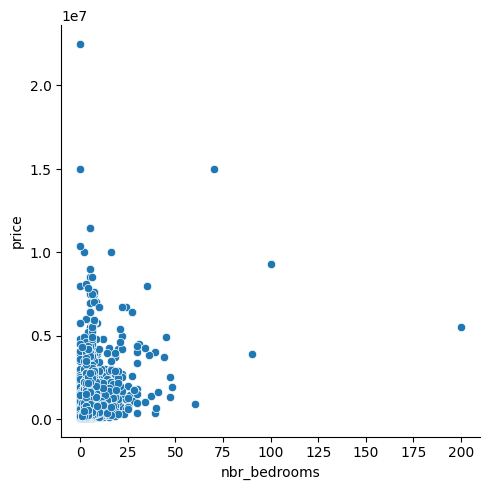

In [34]:
sns.relplot(x="nbr_bedrooms", y="price", data=df, kind="scatter")
plt.show()